In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's start by reading the data

In [2]:
loan_data = pd.read_csv('LoanStats3a.csv', low_memory=False)

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(86), object(25)
memory usage: 36.0+ MB


Count the number of columns with only 1 or 0 values. 

In [6]:
count = 0
for column in loan_data:
    if(loan_data[column].nunique() < 2):
        count +=1
print count

6


Drop all the columns with less than 2 unique values.

In [5]:
loan_data = loan_data.dropna(thresh=2, axis=1)

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42542 entries, 0 to 42541
Data columns (total 57 columns):
id                            42538 non-null object
member_id                     42535 non-null float64
loan_amnt                     42535 non-null float64
funded_amnt                   42535 non-null float64
funded_amnt_inv               42535 non-null float64
term                          42535 non-null object
int_rate                      42535 non-null object
installment                   42535 non-null float64
grade                         42535 non-null object
sub_grade                     42535 non-null object
emp_title                     39911 non-null object
emp_length                    42535 non-null object
home_ownership                42535 non-null object
annual_inc                    42531 non-null float64
verification_status           42535 non-null object
issue_d                       42535 non-null object
loan_status                   42535 non-null object
p

In [8]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

In [9]:
loan_data['loan_status'].value_counts()

Fully Paid                                             34108
Charged Off                                             5662
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Late (31-120 days)                                        10
Current                                                    3
In Grace Period                                            1
Late (16-30 days)                                          1
Default                                                    1
Name: loan_status, dtype: int64

I do not have a lot of context around the loan data so I erred on the side of including more data. I selected the following columns after going through all the columns.
loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, annual_inc, verification_status, loan_status, dti, delinq_2yrs, inq_last_6mths, open_acc, revol_util, total_pymnt_inv, pub_rec_bankruptcies


In [13]:
loan_data = loan_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'verification_status', 'loan_status', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'revol_util', 'total_pymnt_inv', 'pub_rec_bankruptcies']]

In [14]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)', 'Current',
       'Late (16-30 days)', 'In Grace Period', 'Default', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'], dtype=object)

We are interested in either fully paid loans or the defaulted loans. Selecting rows with only those values.

In [15]:
loan_data = loan_data[(loan_data['loan_status'] == 'Fully Paid') | (loan_data['loan_status'] == 'Charged Off')]

Dropping all the empty rows. 

In [16]:
loan_data = loan_data.dropna()

In [17]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39023 entries, 0 to 39749
Data columns (total 16 columns):
loan_amnt               39023 non-null float64
funded_amnt             39023 non-null float64
funded_amnt_inv         39023 non-null float64
term                    39023 non-null object
int_rate                39023 non-null object
installment             39023 non-null float64
annual_inc              39023 non-null float64
verification_status     39023 non-null object
loan_status             39023 non-null object
dti                     39023 non-null float64
delinq_2yrs             39023 non-null float64
inq_last_6mths          39023 non-null float64
open_acc                39023 non-null float64
revol_util              39023 non-null object
total_pymnt_inv         39023 non-null float64
pub_rec_bankruptcies    39023 non-null float64
dtypes: float64(11), object(5)
memory usage: 5.1+ MB


In [24]:
loan_data['term'] = loan_data['term'].apply(lambda x: float(x.split()[0]))

In [25]:
loan_data['int_rate'] = loan_data['int_rate'].apply(lambda x: float(x[:-1]))

In [26]:
loan_data['revol_util'] = loan_data['revol_util'].apply(lambda x: float(x[:-1]))

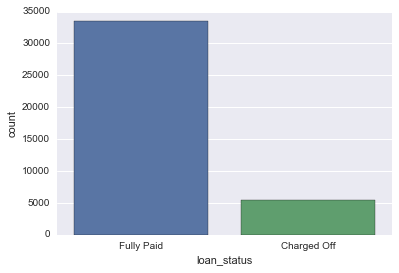

In [27]:
sns.countplot(x='loan_status', data=loan_data)

Let's do a lmplot across multiple attributes to see if there is a relationship between different attributes. 

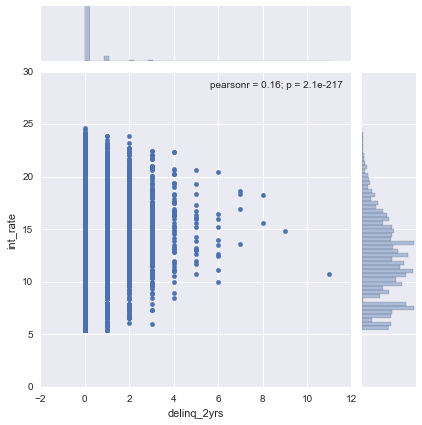

In [29]:
sns.jointplot(x='delinq_2yrs',y='int_rate',data=loan_data)

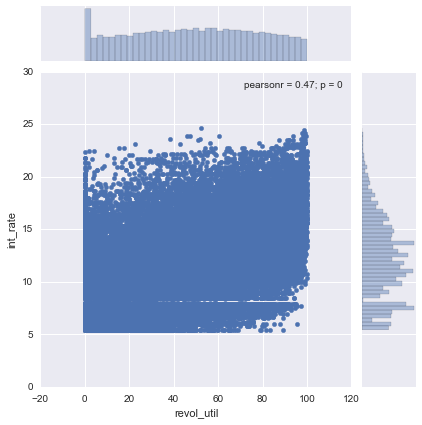

In [37]:
sns.jointplot(x='revol_util',y='int_rate',data=loan_data)

In [34]:
loan_data['term'].head()

0     36 months
1     60 months
2     36 months
3     36 months
4     60 months
Name: term, dtype: object

In [40]:
loan_data['verification_status'].unique()


array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

verification_status and loan_status are categorical values. We'll convert them to numerical values using one hot encoding. 

In [33]:
verification_status = pd.get_dummies(loan_data['verification_status'], drop_first=True)
loan_status = pd.get_dummies(loan_data['loan_status'], drop_first=True)

In [34]:
loan_data.drop(['verification_status', 'loan_status'], axis = 1, inplace=True)

In [35]:
loan_data = pd.concat([loan_data, verification_status, loan_status], axis =1)

In [36]:
loan_data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_pymnt_inv,pub_rec_bankruptcies,Source Verified,Verified,Fully Paid
0,5000.0,5000.0,4975.0,36.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,83.7,5833.84,0.0,0.0,1.0,1.0
1,2500.0,2500.0,2500.0,60.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,9.4,1014.53,0.0,1.0,0.0,0.0
2,2400.0,2400.0,2400.0,36.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,98.5,3005.67,0.0,0.0,0.0,1.0
3,10000.0,10000.0,10000.0,36.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,21.0,12231.89,0.0,1.0,0.0,1.0
4,3000.0,3000.0,3000.0,60.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,53.9,4066.91,0.0,1.0,0.0,1.0
5,5000.0,5000.0,5000.0,36.0,7.90,156.46,36000.0,11.20,0.0,3.0,9.0,28.3,5632.21,0.0,1.0,0.0,1.0
6,7000.0,7000.0,7000.0,60.0,15.96,170.08,47004.0,23.51,0.0,1.0,7.0,85.6,10137.84,0.0,0.0,0.0,1.0
7,3000.0,3000.0,3000.0,36.0,18.64,109.43,48000.0,5.35,0.0,2.0,4.0,87.5,3939.14,0.0,1.0,0.0,1.0
8,5600.0,5600.0,5600.0,60.0,21.28,152.39,40000.0,5.55,0.0,2.0,11.0,32.6,647.50,0.0,1.0,0.0,0.0
9,5375.0,5375.0,5350.0,60.0,12.69,121.45,15000.0,18.08,0.0,0.0,2.0,36.5,1477.70,0.0,0.0,1.0,0.0


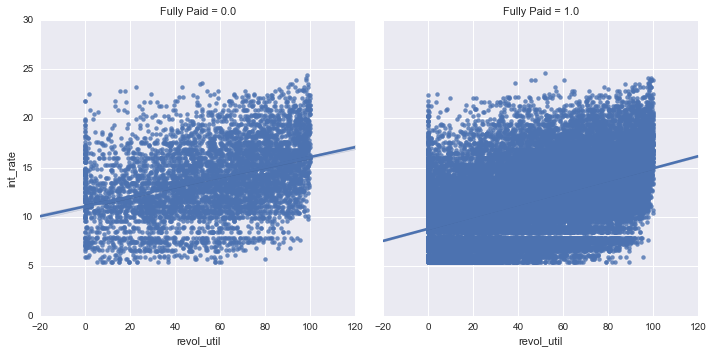

In [39]:
sns.lmplot(x='revol_util',y='int_rate', data=loan_data, col='Fully Paid')

In [40]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39023 entries, 0 to 39749
Data columns (total 17 columns):
loan_amnt               39023 non-null float64
funded_amnt             39023 non-null float64
funded_amnt_inv         39023 non-null float64
term                    39023 non-null float64
int_rate                39023 non-null float64
installment             39023 non-null float64
annual_inc              39023 non-null float64
dti                     39023 non-null float64
delinq_2yrs             39023 non-null float64
inq_last_6mths          39023 non-null float64
open_acc                39023 non-null float64
revol_util              39023 non-null float64
total_pymnt_inv         39023 non-null float64
pub_rec_bankruptcies    39023 non-null float64
Source Verified         39023 non-null float64
Verified                39023 non-null float64
Fully Paid              39023 non-null float64
dtypes: float64(17)
memory usage: 5.4 MB


In [41]:
loan_data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_util,total_pymnt_inv,pub_rec_bankruptcies,Source Verified,Verified,Fully Paid
count,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,3.902300e+04,39023.000000,39023.00000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000,39023.000000
mean,11259.748097,10984.679548,10559.036469,42.562899,12.046209,324.956089,6.899929e+04,13.366081,0.14553,0.866540,9.298132,48.973526,11811.405997,0.043308,0.256234,0.328652,0.858340
std,7478.951411,7206.436232,7110.053430,10.697704,3.744015,208.910806,6.312983e+04,6.668654,0.49014,1.067322,4.380918,28.310206,9056.647014,0.204431,0.436558,0.469729,0.348706
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,0.000000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,5462.500000,5000.000000,36.000000,9.250000,167.340000,4.080000e+04,8.240000,0.00000,0.000000,6.000000,25.550000,5313.715000,0.000000,0.000000,0.000000,1.000000
50%,10000.000000,9750.000000,9000.000000,36.000000,11.860000,280.620000,5.919600e+04,13.450000,0.00000,1.000000,9.000000,49.500000,9497.090000,0.000000,0.000000,0.000000,1.000000
75%,15000.000000,15000.000000,14500.000000,60.000000,14.610000,431.200000,8.250000e+04,18.635000,0.00000,1.000000,12.000000,72.500000,16072.365000,0.000000,1.000000,1.000000,1.000000
max,35000.000000,35000.000000,35000.000000,60.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.00000,8.000000,44.000000,99.900000,58563.680000,2.000000,1.000000,1.000000,1.000000


In [44]:
from sklearn.cross_validation import train_test_split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('Fully Paid',axis=1), 
                                                    loan_data['Fully Paid'], test_size=0.4, 
                                                    random_state=101)

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
predictions = logmodel.predict(X_test)

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

In [80]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.97      0.77      0.86      2121
        1.0       0.96      1.00      0.98     13489

avg / total       0.97      0.97      0.96     15610



In [81]:
from sklearn.tree import DecisionTreeClassifier 

In [82]:
dtree = DecisionTreeClassifier()

In [83]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [84]:
predictions = dtree.predict(X_test)

In [85]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.82      0.83      0.82      2121
        1.0       0.97      0.97      0.97     13489

avg / total       0.95      0.95      0.95     15610



In [86]:
from sklearn import svm

In [87]:
lin_svc = svm.LinearSVC(random_state=101)

In [88]:
lin_svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=101, tol=0.0001,
     verbose=0)

In [89]:
predictions = lin_svc.predict(X_test)

In [90]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.99      0.71      0.82      2121
        1.0       0.96      1.00      0.98     13489

avg / total       0.96      0.96      0.96     15610



In [91]:
confusion_matrix(y_test,predictions)

array([[ 1501,   620],
       [   22, 13467]])

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rfc = RandomForestClassifier(n_estimators=200)

In [94]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [95]:
predictions = rfc.predict(X_test)

In [96]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.99      0.75      0.85      2121
        1.0       0.96      1.00      0.98     13489

avg / total       0.97      0.96      0.96     15610



In [74]:
confusion_matrix(y_test,predictions)

array([[ 1402,   438],
       [    7, 11812]])